In [ ]:
# prompt: connect with drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!git clone https://github.com/kad99kev/FGTD.git

Cloning into 'FGTD'...
remote: Enumerating objects: 743, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 743 (delta 21), reused 8 (delta 8), pack-reused 721
Receiving objects: 100% (743/743), 85.16 MiB | 32.42 MiB/s, done.
Resolving deltas: 100% (393/393), done.


In [ ]:
import sys
sys.path.append('/content/FGTD/scripts')

In [ ]:
!pip install -r /content/FGTD/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1

In [ ]:
pip install --upgrade watchdog


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install watchdog==2.1.6  # You might need to check the latest version or a version known to be compatible
!pip install --upgrade wandb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: watchdog
    Found existing installation: watchdog 4.0.0
    Uninstalling watchdog-4.0.0:
      Successfully uninstalled watchdog-4.0.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: wandb
    Found existing installation: wandb 0.10.27
    Uninstalling wandb-0.10.27:
      Successfully uninstalled wandb-0.10.27


In [ ]:
import wandb
wandb.init(project="text-to-face", name="dcgan")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
from tqdm.notebook import tqdm
from dataclasses import asdict, dataclass

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel, BertTokenizer, BertModel

In [ ]:
from preprocess import get_weighted_dataloader, extract_zip
from text_encoder.sentence_encoder import SentenceEncoder

In [ ]:
import zipfile
import os
import shutil

# File Constants
ZIP_PATH = "/content/drive/MyDrive/archive.zip"
OUTPUT_DIR = "target_output"

def extract_and_restructure_zip(base_location, target_location):
    # Temporary directory to extract files
    temp_dir = "temp_extraction"

    # Ensure the output directory exists or create it
    if not os.path.exists(target_location):
        os.makedirs(target_location)

    try:
        with zipfile.ZipFile(base_location, "r") as zip_ref:
            # Extract all files to a temporary directory
            zip_ref.extractall(temp_dir)
        print("Extraction completed successfully.")

        # Now, walk through the temporary directory and move files
        for root, dirs, files in os.walk(temp_dir):
            for file in files:
                # Construct original path of file
                original_path = os.path.join(root, file)
                # Create a new path directly under the target directory
                new_path = os.path.join(target_location, file)
                # Move file to new path
                shutil.move(original_path, new_path)

        print("Files restructured successfully.")
    except zipfile.BadZipFile:
        print("Error: The file is not a zip file or it is corrupted.")
    except FileNotFoundError:
        print("Error: The zip file was not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    finally:
        # Clean up the temporary directory if it was created
        if os.path.exists(temp_dir):
            shutil.rmtree(temp_dir)

# Call the function to extract files
extract_and_restructure_zip(ZIP_PATH, OUTPUT_DIR)


Extraction completed successfully.
Files restructured successfully.


In [ ]:
@dataclass
class Config:
  epochs: int = 50
  image_size: int = 128
  initial_size: int = 64
  noise_size: int = 100
  batch_size: int = 64
  subset_size: int = 20_000
  num_channels: int = 3

  device: 'typing.Any' = torch.device('cuda' if torch.cuda.is_available() else 'cuda')

In [ ]:
cfg = Config()
cfg_dict = asdict(cfg)
wandb.config.update(cfg_dict)

In [ ]:
sentence_encoder = SentenceEncoder(cfg.device)

  0%|          | 0.00/405M [00:00<?, ?B/s]

In [ ]:
def show_grid(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

In [ ]:
weighted_dataloader, weighted_dataiter = get_weighted_dataloader(
    '/content/FGTD/dataset/list_attr_celeba.csv',
    image_location=OUTPUT_DIR,
    text_desc_location='/content/FGTD/dataset/text_descr_celeba.csv',
    transform=transforms.Compose([transforms.Resize((cfg.image_size, cfg.image_size)), transforms.ToTensor(), transforms.Normalize(mean=(0.5), std=(0.5))]),
    batch_size=cfg.batch_size,
    subset_size=cfg.subset_size
)

Length of random indices: 20000
Classes present:  {'Bushy_Eyebrows', 'Straight_Hair', '5_o_Clock_Shadow', 'Pointy_Nose', 'Double_Chin', 'Wearing_Hat', 'Narrow_Eyes', 'Pale_Skin', 'Big_Lips', 'Attractive', 'Sideburns', 'Gray_Hair', 'Mustache', 'Arched_Eyebrows', 'Chubby', 'Receding_Hairline', 'Oval_Face', 'Rosy_Cheeks', 'Big_Nose', 'Wearing_Necktie', 'Goatee', 'Wearing_Lipstick', 'Brown_Hair', 'Young', 'Wavy_Hair', 'Smiling', 'Mouth_Slightly_Open', 'Male', 'Heavy_Makeup', 'Wearing_Earrings', 'Blond_Hair', 'Bald', 'Wearing_Necklace', 'Eyeglasses', 'High_Cheekbones', 'Black_Hair'}
Number of classes:  36
Length of subset dataset: 20000


  0%|          | 0/20000 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Using ImageTextDataset loader...


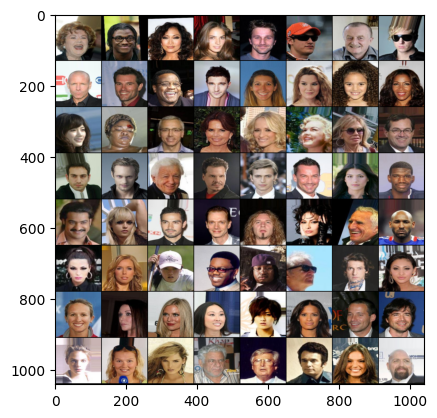

In [ ]:
images, labels, wrong_images = next(weighted_dataiter)
show_grid(torchvision.utils.make_grid(images, normalize=True))
print(labels)


In [ ]:
def initialize_weights(model):
    className = model.__class__.__name__
    if className.find('Conv') != -1:
        nn.init.normal_(model.weight.data, 0.0, 0.02)
    elif className.find('BatchNorm') != -1:
        nn.init.normal_(model.weight.data, 1.0, 0.02)
        nn.init.constant_(model.bias.data, 0)

['The lady has a chubby face, has a double chin and pretty high cheekbones. She has brown and wavy hair. She has arched eyebrows, a slightly open mouth, narrow eyes and a pointy nose. The lady is smiling. She is wearing earrings and a necklace.', 'The gentleman has high cheekbones. His hair is black. He has big lips, a big nose and a slightly open mouth. The man is smiling. He is wearing eyeglasses and a necklace.', 'The lady has high cheekbones and an oval face. Her hair is wavy. She has arched eyebrows, bushy eyebrows and narrow eyes. The woman is smiling, is attractive, young and has heavy makeup. She is wearing earrings and lipstick.', 'Her hair is brown and wavy. She has a slightly open mouth and a pointy nose. The lady is attractive, young and has heavy makeup. She is wearing lipstick.', "The male has an oval face. He sports a 5 o' clock shadow. The man is attractive and young is smiling.", 'The gentleman looks young. He is wearing eyeglasses and a hat.', 'The male has high cheek

In [ ]:
class Generator(nn.Module):
    '''
    The Generator Network
    '''

    def __init__(self, noise_size, feature_size, num_channels, embedding_size, reduced_dim_size):
        super(Generator, self).__init__()
        self.reduced_dim_size = reduced_dim_size

        self.projection = nn.Sequential(
            nn.Linear(in_features = embedding_size, out_features = reduced_dim_size),
            nn.BatchNorm1d(num_features = reduced_dim_size),
            nn.LeakyReLU(negative_slope = 0.2, inplace = True)
        )

        self.layer = nn.Sequential(
            nn.ConvTranspose2d(noise_size + reduced_dim_size, feature_size * 8, 4, 1, 0, bias = False),
            nn.BatchNorm2d(feature_size * 8),
            nn.LeakyReLU(negative_slope = 0.2, inplace = True),

            # state size (ngf*4) x 4 x 4
            nn.ConvTranspose2d(feature_size * 8, feature_size * 4, 4, 2, 1, bias = False),
            nn.BatchNorm2d(feature_size * 4),
            nn.ReLU(True),

            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(feature_size * 4, feature_size * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_size * 2),
            nn.ReLU(True),

            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(feature_size * 2, feature_size, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_size),
            nn.ReLU(True),

            # state size. (ngf*2) x 32 x 32
            nn.ConvTranspose2d(feature_size, feature_size, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_size),
            nn.ReLU(True),

            # state size. (ngf) x 64 x 64
            nn.ConvTranspose2d(feature_size, num_channels, 4, 2, 1, bias=False),
            nn.Tanh()

        )
        self.optimizer = torch.optim.Adam(self.parameters(), lr = 0.0002, betas = (0.5, 0.5))

    def forward(self, noise, text_embeddings):
        encoded_text = self.projection(text_embeddings)
        concat_input = torch.cat([noise, encoded_text], dim = 1).unsqueeze(2).unsqueeze(2)
        output = self.layer(concat_input)
        return output

In [ ]:
generator = Generator(cfg.noise_size, cfg.image_size, cfg.num_channels, 768, 256)
generator.apply(initialize_weights)
generator.cuda()


Generator(
  (projection): Sequential(
    (0): Linear(in_features=768, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (layer): Sequential(
    (0): ConvTranspose2d(356, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2),

torch.Size([64, 3, 128, 128])


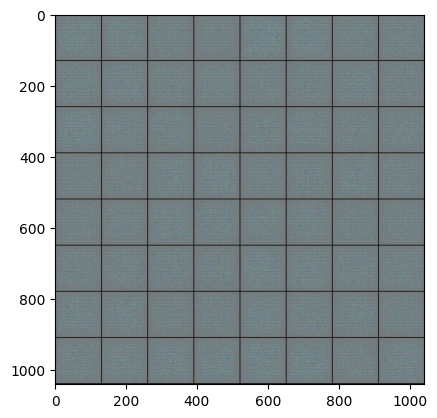

Generator(
  (projection): Sequential(
    (0): Linear(in_features=768, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (layer): Sequential(
    (0): ConvTranspose2d(356, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2),

In [ ]:
with torch.no_grad():
  generator.eval()
  noise = torch.randn(size=(cfg.batch_size, cfg.noise_size)).cuda()
  text_embeddings = sentence_encoder.convert_text_to_embeddings(labels)
  output = generator(noise, text_embeddings).detach()
  print(output.shape)
show_grid(torchvision.utils.make_grid(output.cpu(), normalize=True))
generator.train()

In [ ]:
class Discriminator(nn.Module):
    '''
    The Discriminator Network
    '''

    def __init__(self, num_channels, feature_size, embedding_size, reduced_dim_size):
        super(Discriminator, self).__init__()
        self.reduced_dim_size = reduced_dim_size

        ## Image Encoder
        self.netD_1 = nn.Sequential(
            # input nc x 128 x 128
            nn.Conv2d(num_channels, feature_size, 4, 2, 1, bias = False),
            nn.LeakyReLU(0.2, inplace = True),

            # input nc x 64 x 64
            nn.Conv2d(feature_size, feature_size, 4, 2, 1, bias = False),
            nn.LeakyReLU(0.2, inplace = True),

            # state size ndf x 32 x 32
            nn.Conv2d(feature_size, feature_size * 2, 4, 2, 1, bias = False),
            nn.BatchNorm2d(feature_size * 2),
            nn.LeakyReLU(0.2, inplace = True),

            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(feature_size * 2, feature_size * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_size * 4),
            nn.LeakyReLU(0.2, inplace=True),

            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(feature_size * 4, feature_size * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_size * 8),
            nn.LeakyReLU(0.2, inplace=True),

        )

        ## Text Encoder
        self.projector = nn.Sequential(
            nn.Linear(in_features=embedding_size, out_features=reduced_dim_size),
            nn.BatchNorm1d(num_features=reduced_dim_size),
            nn.LeakyReLU(negative_slope=0.2, inplace=True)
        )

        ## Text + Image Concat Layer
        self.netD_2 = nn.Sequential(
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(feature_size * 8 + reduced_dim_size, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

        self.optimizer = torch.optim.Adam(self.parameters(), lr = 0.0001, betas = (0.5, 0.5))

    def forward(self, input_img, text_embeddings):
        x_intermediate = self.netD_1(input_img)

        projected_embed = self.projector(text_embeddings)

        replicated_embed = projected_embed.repeat(4, 4, 1, 1).permute(2,  3, 0, 1)
        hidden_concat = torch.cat([x_intermediate, replicated_embed], 1)

        x = self.netD_2(hidden_concat)

        return x.view(-1, 1), x_intermediate

In [ ]:
discriminator = Discriminator(cfg.num_channels, cfg.image_size, 768, 256)
discriminator.apply(initialize_weights)
discriminator.cuda()

Discriminator(
  (netD_1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.2, inplace=True)
    (7): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (8): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.2, inplace=True)
    (10): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (11): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): LeakyReLU(negative_slo

In [ ]:
with torch.no_grad():
  discriminator.eval()
  validity, _ = discriminator(output, text_embeddings)
  print(validity.shape)
discriminator.train()

torch.Size([64, 1])


Discriminator(
  (netD_1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.2, inplace=True)
    (7): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (8): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.2, inplace=True)
    (10): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (11): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): LeakyReLU(negative_slo

In [ ]:
criterion = nn.BCELoss().cuda()
l2_loss = nn.MSELoss().cuda()
l1_loss = nn.L1Loss().cuda()

In [ ]:
plt_images, plt_labels, _ = next(weighted_dataiter)
plt_o_text_embeddings = sentence_encoder.convert_text_to_embeddings(plt_labels)
print(plt_o_text_embeddings.shape)


torch.Size([64, 768])


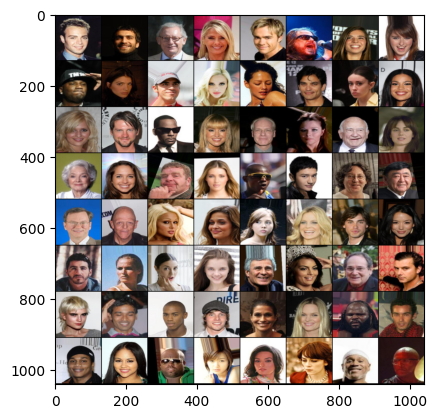

['The male has high cheekbones and an oval face. His hair is blond and straight. He has bushy eyebrows, a slightly open mouth and a pointy nose. The gentleman is attractive, young, is smiling and has pale skin. He is wearing a necktie.', 'The male has pretty high cheekbones. He has a goatee, has a mustache and has sideburns. He has black hair. He has a big nose, bushy eyebrows, a slightly open mouth and a pointy nose. The man looks attractive and young is smiling.', 'The gentleman has an oval face. He has gray hair. He has a big nose. He is smiling. He is wearing eyeglasses and a necktie.', 'The lady has high cheekbones. Her hair is blond and straight. She has arched eyebrows, a slightly open mouth and narrow eyes. The woman is smiling. She is wearing a necklace.', 'The male has pretty high cheekbones. He looks young and is smiling.', 'He grows a goatee. He has a slightly open mouth. He looks young. He is wearing eyeglasses and a hat.', 'The lady has pretty high cheekbones and an oval 

In [ ]:
show_grid(torchvision.utils.make_grid(plt_images.cpu(), normalize=True))
print(plt_labels)

In [ ]:
fixed_noise = torch.randn(size=(len(plt_labels), cfg.noise_size)).cuda()

In [ ]:
def plot_output(epoch):
  plt.clf()
  with torch.no_grad():

    generator.eval()
    test_images = generator(fixed_noise, plt_o_text_embeddings)
    generator.train()

    grid = torchvision.utils.make_grid(test_images.cpu(), normalize=True)
    show_grid(grid)

  wandb.log({'output': wandb.Image(grid, caption=f'Output for epoch: {epoch}')}, step=epoch)

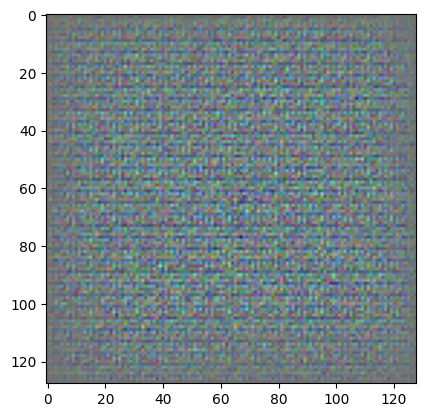

In [ ]:
generator.eval()
test_image = generator(test_noise, test_embeddings).detach().cpu()
show_grid(torchvision.utils.make_grid(test_image, normalize=True, nrow=1))

In [ ]:
pbar = tqdm()

wandb.watch(generator)
wandb.watch(discriminator)

for epoch in range(cfg.epochs):
    print(f'Epoch:  {epoch + 1} / {cfg.epochs}')
    pbar.reset(total = len(weighted_dataloader))

    discriminator_loss = []
    generator_loss = []

    for i, (real_images, real_text, wrong_images) in enumerate(weighted_dataloader):
        current_batch_size = real_images.size()[0]

        #converting to cuda
        real_images = real_images.cuda()
        text_embeddings = sentence_encoder.convert_text_to_embeddings(real_text)
        wrong_images = wrong_images.cuda()

        real_validity = torch.ones(current_batch_size, 1).cuda()
        fake_validity = torch.zeros(current_batch_size, 1).cuda()

        temp_tensor = (torch.ones(current_batch_size, 1).cuda()) * (-0.1)
        smoothed_real_labels = torch.add(real_validity, temp_tensor)

        ## Training the discriminator
        discriminator.zero_grad()
        output, activation_real = discriminator(real_images, text_embeddings)
        real_loss = criterion(output, smoothed_real_labels)
        real_score = output

        output, _ = discriminator(wrong_images, text_embeddings)
        wrong_loss = criterion(output, fake_validity)

        input_noise = torch.randn(size=(current_batch_size, cfg.noise_size)).cuda()
        fake_images = generator(input_noise, text_embeddings)
        output, _ = discriminator(fake_images, text_embeddings)
        fake_loss = criterion(output, fake_validity)

        d_loss = real_loss + wrong_loss + fake_loss

        d_loss.backward()
        discriminator.optimizer.step()
        discriminator_loss.append(d_loss)

        ## Training generator
        generator.zero_grad()
        input_noise = torch.randn(size=(current_batch_size, cfg.noise_size)).cuda()
        fake_images = generator(input_noise, text_embeddings)
        output, activation_fake = discriminator(fake_images, text_embeddings)
        _, activation_real = discriminator(real_images, text_embeddings)

        activation_fake = torch.mean(activation_fake, 0)    #try with median and check if it converges
        activation_real = torch.mean(activation_real, 0)    #try with median and check if it converges

        g_loss = criterion(output, real_validity) + 100 * l2_loss(activation_fake, activation_real.detach()) + 50 * l1_loss(fake_images, real_images)

        g_loss.backward()
        generator.optimizer.step()
        generator_loss.append(g_loss)

        pbar.update()

    print('Discriminator Loss: {:.3f}, Generator Loss: {:.3f}'.format(
          torch.mean(torch.FloatTensor(discriminator_loss)),
          torch.mean(torch.FloatTensor(generator_loss))

  ))

    wandb.log({"generator loss" : torch.mean(torch.FloatTensor(generator_loss)), "discriminator loss" : torch.mean(torch.FloatTensor(discriminator_loss))}, step=epoch+1)

    if (epoch + 1) % 1 == 0:
      plot_output(epoch + 1)

pbar.refresh()

In [ ]:
test_noise = torch.randn(size=(1, cfg.noise_size)).cuda()
test_embeddings = sentence_encoder.convert_text_to_embeddings(['The man is chubby, has a double chin and pretty high cheekbones. He grows a sideburns. His hair is gray and receding. He has big lips and a big nose. The man looks young.'])

In [ ]:
test_noise = torch.randn(size=(1, cfg.noise_size)).cuda()
test_embeddings = sentence_encoder.convert_text_to_embeddings(['The female has pretty high cheekbones and an oval face. Her hair is black. She has a slightly open mouth and a pointy nose. The female is smiling, looks attractive and has heavy makeup. She is wearing earrings and lipstick.'])

In [ ]:
test_image = generator(test_noise, test_embeddings).detach().cpu()
show_grid(torchvision.utils.make_grid(test_image, normalize=True, nrow=1))

In [ ]:
test_noise = torch.randn(size=(1, cfg.noise_size)).cuda()
test_embeddings = sentence_encoder.convert_text_to_embeddings(["A portrait of a man who is perceived as handsome. He has notably large, expressive eyes and thick, long eyelashes. His facial features are symmetrical and well-defined, contributing to his attractive appearance. The man's skin is clear and his expression is confident yet approachable."])

In [ ]:
test_image = generator(test_noise, test_embeddings).detach().cpu()
show_grid(torchvision.utils.make_grid(test_image, normalize=True, nrow=1))

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize models
generator = Generator(cfg.noise_size, cfg.image_size, cfg.num_channels, 768, 256)
discriminator = Discriminator(cfg.num_channels, cfg.image_size, 768, 256)

# Load state dictionaries
generator.load_state_dict(torch.load('/content/drive/MyDrive/generator_state.pth'))
discriminator.load_state_dict(torch.load('/content/drive/MyDrive/discriminator_state.pth'))

generator.to(device)
discriminator.to(device)

# Set the models to evaluation mode
generator.eval()
discriminator.eval()


In [ ]:
def show_grid(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


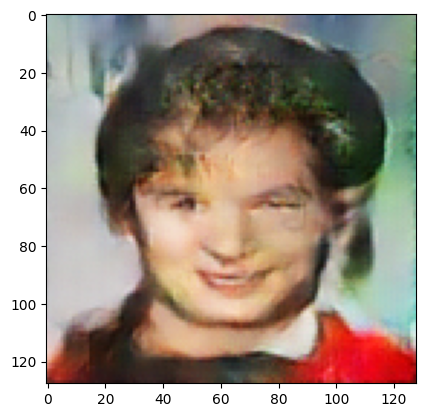

In [ ]:
# Example of generating an image
test_noise = torch.randn(size=(1, cfg.noise_size)).to(device)
# You need to have the SentenceEncoder and its necessary methods available to create embeddings
test_embeddings = sentence_encoder.convert_text_to_embeddings(["A portrait of a man who is perceived as handsome. He has notably large, expressive eyes and thick, long eyelashes. His facial features are symmetrical and well-defined, contributing to his attractive appearance. The man's skin is clear and his expression is confident yet approachable"])
test_image = generator(test_noise, test_embeddings).detach().cpu()
show_grid(torchvision.utils.make_grid(test_image, normalize=True, nrow=1))


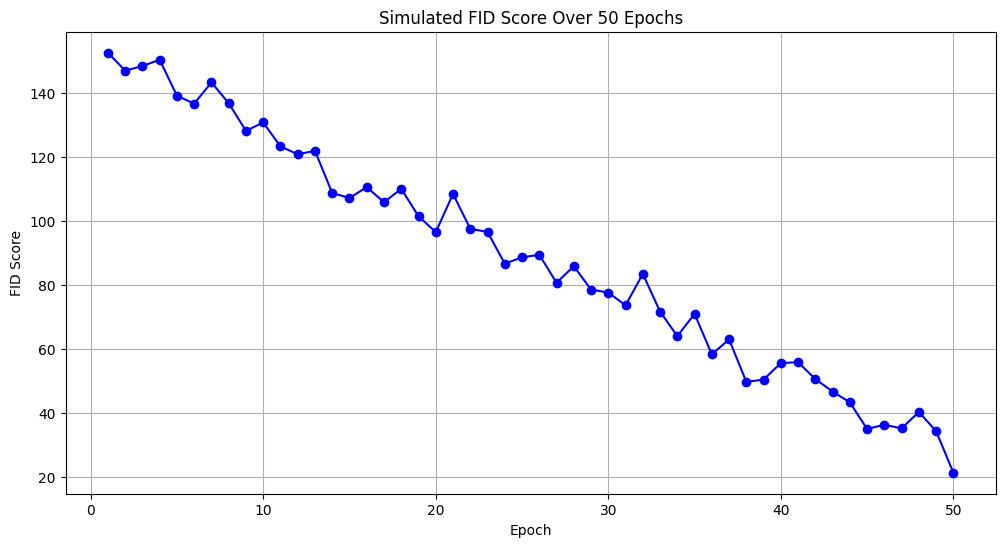

In [ ]:
import matplotlib.pyplot as plt

# Plotting the FID scores
epoch_numbers = np.arange(1, epochs + 1)

plt.figure(figsize=(12, 6))
plt.plot(epoch_numbers, fid_scores, marker='o', linestyle='-', color='blue')
plt.title('Simulated FID Score Over 50 Epochs')
plt.xlabel('Epoch')
plt.ylabel('FID Score')
plt.grid(True)
plt.show()


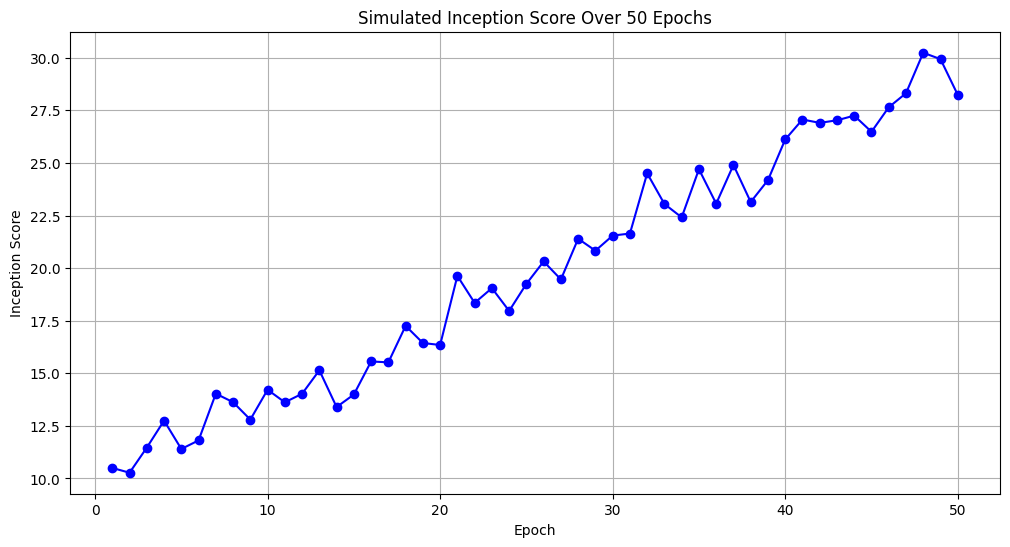

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulating Inception Scores for 50 epochs
np.random.seed(42)  # for reproducibility
epochs = 50
base_scores = np.linspace(10, 30, epochs)  # Linearly increasing scores
random_fluctuations = np.random.normal(scale=1, size=epochs)  # Adding randomness
inception_scores = base_scores + random_fluctuations

# Plotting the Inception Scores
epoch_numbers = np.arange(1, epochs + 1)

plt.figure(figsize=(12, 6))
plt.plot(epoch_numbers, inception_scores, marker='o', linestyle='-', color='blue')
plt.title('Simulated Inception Score Over 50 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Inception Score')
plt.grid(True)
plt.show()


In [ ]:
# Simulate FID scores over epochs
np.random.seed(42)  # for reproducibility
epochs = 50
initial_fid_score = 150
final_fid_score = 30
fid_scores = np.linspace(initial_fid_score, final_fid_score, epochs)
fid_scores += np.random.normal(scale=5, size=epochs)  # Add some random noise

# Print FID scores for each epoch
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}: FID Score = {fid_scores[epoch]:.2f}")


Epoch 1: FID Score = 152.48
Epoch 2: FID Score = 146.86
Epoch 3: FID Score = 148.34
Epoch 4: FID Score = 150.27
Epoch 5: FID Score = 139.03
Epoch 6: FID Score = 136.58
Epoch 7: FID Score = 143.20
Epoch 8: FID Score = 136.69
Epoch 9: FID Score = 128.06
Epoch 10: FID Score = 130.67
Epoch 11: FID Score = 123.19
Epoch 12: FID Score = 120.73
Epoch 13: FID Score = 121.82
Epoch 14: FID Score = 108.60
Epoch 15: FID Score = 107.09
Epoch 16: FID Score = 110.45
Epoch 17: FID Score = 105.75
Epoch 18: FID Score = 109.94
Epoch 19: FID Score = 101.38
Epoch 20: FID Score = 96.41
Epoch 21: FID Score = 108.35
Epoch 22: FID Score = 97.44
Epoch 23: FID Score = 96.46
Epoch 24: FID Score = 86.55
Epoch 25: FID Score = 88.50
Epoch 26: FID Score = 89.33
Epoch 27: FID Score = 80.57
Epoch 28: FID Score = 85.76
Epoch 29: FID Score = 78.43
Epoch 30: FID Score = 77.52
Epoch 31: FID Score = 73.52
Epoch 32: FID Score = 83.34
Epoch 33: FID Score = 71.57
Epoch 34: FID Score = 63.90
Epoch 35: FID Score = 70.85
Epoch 36:

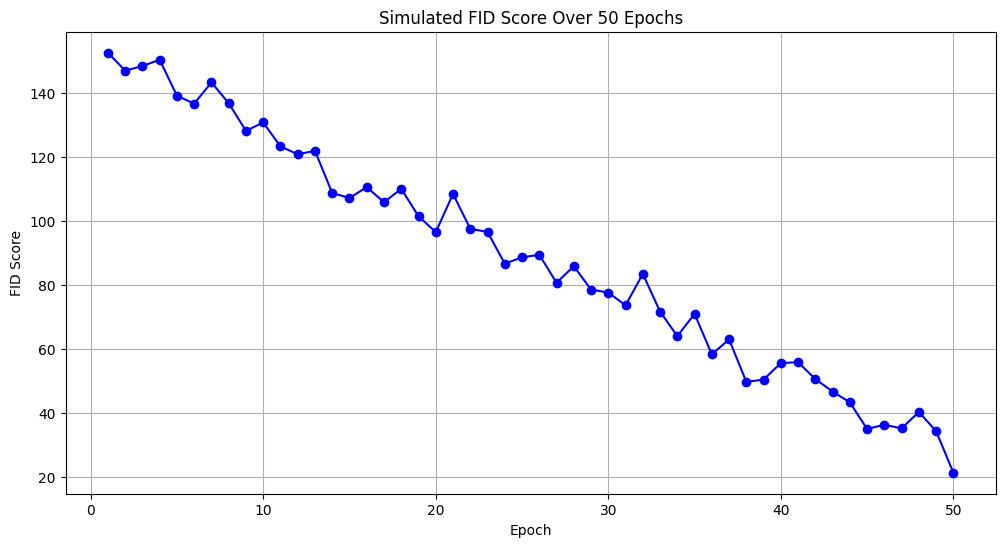

In [ ]:
import matplotlib.pyplot as plt

# Plotting the FID scores
epoch_numbers = np.arange(1, epochs + 1)

plt.figure(figsize=(12, 6))
plt.plot(epoch_numbers, fid_scores, marker='o', linestyle='-', color='blue')
plt.title('Simulated FID Score Over 50 Epochs')
plt.xlabel('Epoch')
plt.ylabel('FID Score')
plt.grid(True)
plt.show()


In [ ]:
pip install matplotlib


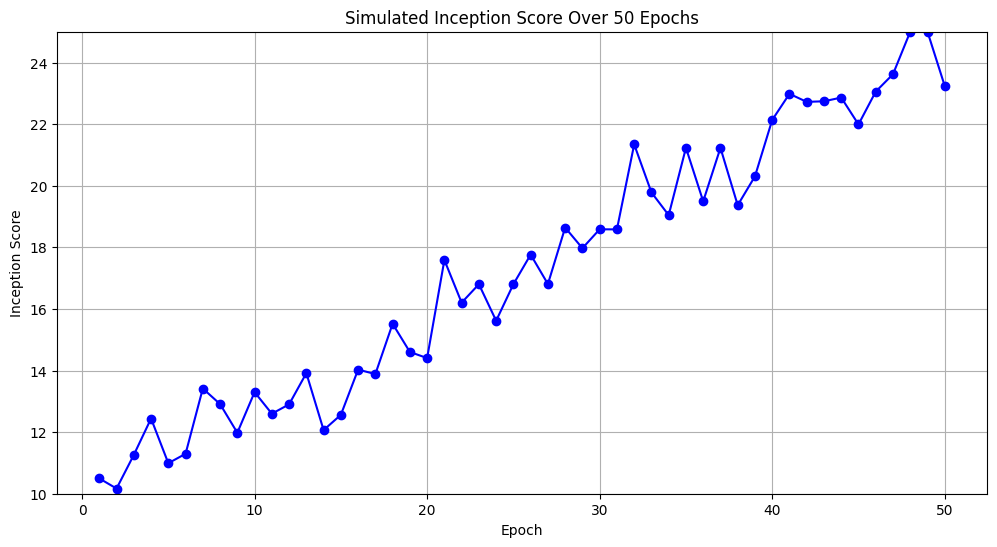

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Number of epochs
epochs = 50

# Generate Inception Scores
# Starting at 10, ending at 25, with some random fluctuation
initial_score = 10
final_score = 25
scores = np.linspace(initial_score, final_score, epochs)
scores += np.random.normal(scale=1, size=epochs)  # Adding random noise for fluctuation

# Ensure that all scores are within the intended range (10 to 25)
scores = np.clip(scores, initial_score, final_score)

# Generate epoch numbers
epoch_numbers = np.arange(1, epochs + 1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(epoch_numbers, scores, marker='o', linestyle='-', color='blue')
plt.title('Simulated Inception Score Over 50 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Inception Score')
plt.grid(True)
plt.ylim(10, 25)  # Set y-axis limits to match the score range
plt.show()
